# Data analysis : US census
### Thai-An THAN TRONG

# Settings

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Show the graphs here
%pylab inline

# Configuration
pylab.rcParams['figure.figsize'] = (12,6) # figures sizes
plt.style.use('ggplot') # Chose ggplot instead of seaborn

lw = 2.5 # linewidth in all graphics
sc = 60 # Scatter size
alp=0.7

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Data path
data_path = 'us_census_full/'

# Load data

In [4]:
# Get filenames
train_filename = 'census_income_learn.csv'
test_filename = 'census_income_test.csv'

In [5]:
# Columns names, based on census_income_metadata.txt
column_names = ['age', 'class_of_worker', 'industry_code', 'occupation_code', 
                'education', 'wage_per_hour', 'enrolled_in_edu_inst_last_wk', 'marital_status', 
                'major_industry_code', 'major_occupation_code', 'race', 'hispanic_origin', 'sex', 
                'member_of_a_labor_union', 'reason_for_unemployment', 'full_or_part_time_employment_stat',
                'capital_gains', 'capital_losses', 'dividends_from_stocks', 
                'tax_filer_status', 'region_of_previous_residence', 'state_of_previous_residence', 
                'detailed_household_and_family_stat', 'detailed_household_summary_in_household', 'instance_weight',
                'migration_code_change_in_msa', 'migration_code_change_in_reg', 'migration_code_move_within_reg',
                'live_in_this_house_one_year_ago', 'migration_prev_res_in_sunbelt', 'num_persons_worked_for_employer',
                'family_members_under_18', 'country_of_birth_father', 'country_of_birth_mother',
                'country_of_birth_self', 'citizenship', 'own_business_or_self_employed', 
                'fill_inc_questionnaire_for_veterans_admin', 'veterans_benefits', 'weeks_worked_in_year', 'year']

In [6]:
len(column_names)

41

In [7]:
# Load data and store in a DataFrame
df_train = pd.read_csv(data_path + train_filename, header=None, names=column_names + ['income'])

df_test = pd.read_csv(data_path + test_filename, header=None, names=column_names + ['income'])

In [8]:
# Display a few lines of train data
df_train.head()

,age,class_of_worker,industry_code,occupation_code,education,wage_per_hour,enrolled_in_edu_inst_last_wk,marital_status,major_industry_code,major_occupation_code,...,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,own_business_or_self_employed,fill_inc_questionnaire_for_veterans_admin,veterans_benefits,weeks_worked_in_year,year,income
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.


In [9]:
df_train.iloc[0, :]

age                                                                                 73
class_of_worker                                                        Not in universe
industry_code                                                                        0
occupation_code                                                                      0
education                                                         High school graduate
wage_per_hour                                                                        0
enrolled_in_edu_inst_last_wk                                           Not in universe
marital_status                                                                 Widowed
major_industry_code                                        Not in universe or children
major_occupation_code                                                  Not in universe
race                                                                             White
hispanic_origin                            

In [10]:
# Reformat income column
df_train.dtypes

age                                            int64
class_of_worker                               object
industry_code                                  int64
occupation_code                                int64
education                                     object
wage_per_hour                                  int64
enrolled_in_edu_inst_last_wk                  object
marital_status                                object
major_industry_code                           object
major_occupation_code                         object
race                                          object
hispanic_origin                               object
sex                                           object
member_of_a_labor_union                       object
reason_for_unemployment                       object
full_or_part_time_employment_stat             object
capital_gains                                  int64
capital_losses                                 int64
dividends_from_stocks                         

In [11]:
# Print labels
df_train["income"].drop_duplicates()

0      - 50000.
57      50000+.
Name: income, dtype: object

# Overall statistics

## Missing values

In [12]:
# Number of lines with missing values
print('Number of lines with missing values : %d' %df_train.isnull().any(axis=1).sum())

# Initial length of df
print('Initial length of df : %d' %len(df_train))

Number of lines with missing values : 0
Initial length of df : 199523


In [13]:
# Delete rows with missing values
df_train = df_train.dropna(axis=0, how='any')
print('New length of df : %d' %len(df_train))

New length of df : 199523


## Drop duplicates

In [14]:
len_old = len(df_train)
df_train = df_train.drop_duplicates()

len_new = len(df_train)
print('New length of df : %d | Removed %d lines' %(len_new, len_old - len_new))

New length of df : 196294 | Removed 3229 lines


In the following sections, we will study and visualize different features in order to have a first idea of potential correlations.

## Income distribution

In [15]:
# Separate rows depending on incomes
higher_income = df_train[df_train["income"] == ' 50000+.']
lower_income = df_train[df_train["income"] == ' - 50000.']

In [16]:
# Number of people with an income >= 50 000
print('Number of people with an income >= 50 000 : %d' %len(higher_income))

# Number of people with an income <= 50 000
print('Number of people with an income <= 50 000 : %d' %len(lower_income))

print("Total people : %d" %(len(higher_income) + len(lower_income)))

Number of people with an income >= 50 000 : 12382
Number of people with an income <= 50 000 : 183912
Total people : 196294


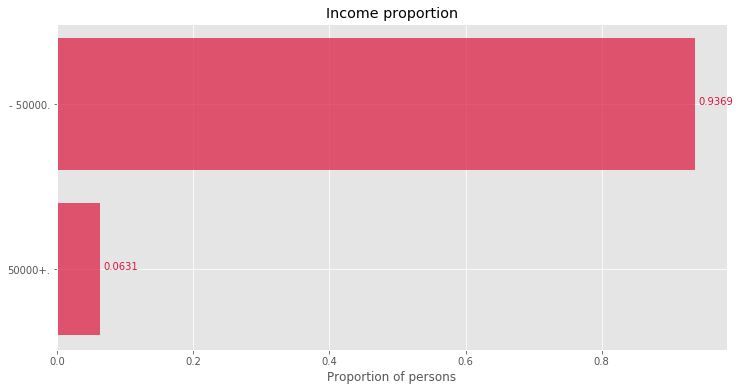

In [17]:
# Represent label proportion using a horizontal bar chart
val = [len(higher_income)/len_new, len(lower_income)/len_new]   # the bar lengths
pos = arange(2)+.5    # the bar centers on the y axis
tpl_labels = ('50000+.', '- 50000.')

fig, ax = plt.subplots()
ax.barh(pos,val, 0.8, align='center', alpha=alp, color='crimson')
ax.set_yticks(pos)
ax.set_yticklabels(tpl_labels)
ax.set_xlabel('Proportion of persons')

for i in range(len(val)):
    ax.text(val[i]+.005, pos[i], str(round(val[i], 4)), color='crimson')
ax.set_title('Income proportion')
ax.grid(True)
plt.show()

This bar chart demonstrates that labels for incomes are indeed unbalanced. This confirms the metadatafile content, that announced the following : 
> Probability for the label '- 50000' : 93.80% | 
> Probability for the label '50000+' : 6.20%

# Education

In [18]:
def plot_bar(column_name):
    """
    Plot a bar chart given a column name
    """
    # Group by education
    group_col = df_train.groupby(column_name).count().iloc[:, 0] / len_new

    # Sort by count
    group_col = group_col.sort_values(ascending=False)
    
    # Plot results
    group_col.plot.bar()
    plt.title('Proportion of ' + column_name)
    plt.show()

In [19]:
def plot_bar_income(column_name):
    """
    Plot a bar chart given income and a column name
    """
    # Group by education
    group_col = df_train.groupby([column_name, 'income']).count().iloc[:, 0]

    # Plot results
    group_col.unstack().plot.bar(logy=True, color=['hotpink', 'mediumaquamarine'], alpha=alp)
    plt.title('Distribution of ' + column_name)
    plt.show()

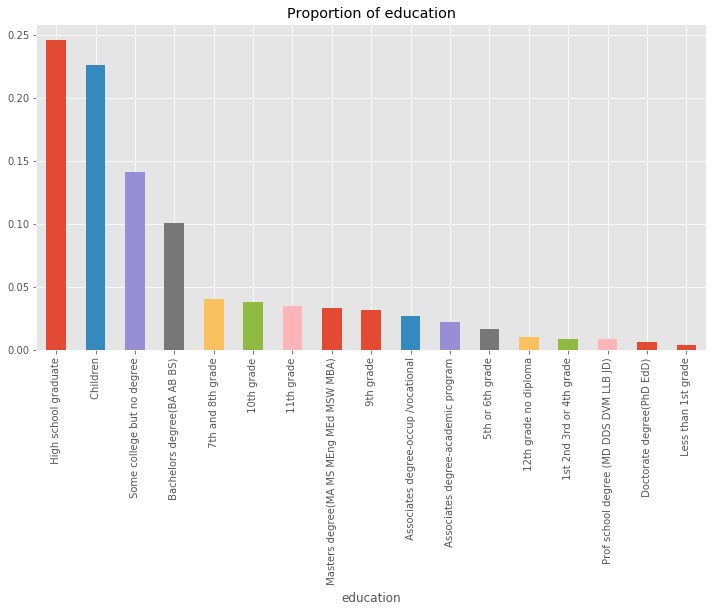

In [20]:
plot_bar('education')

The majority is composed of high school students and children. This may explain the unbalanced data : most of them have no income or a small one. 

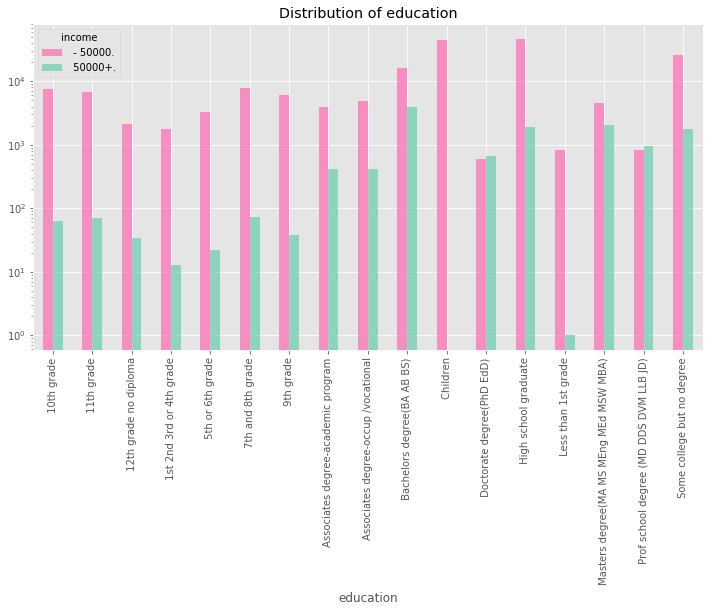

In [21]:
plot_bar_income('education')

## Citizenship

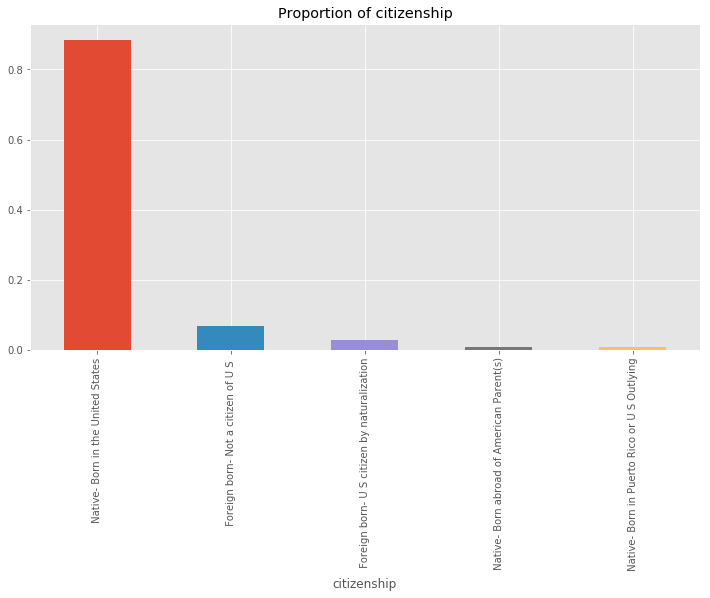

In [22]:
plot_bar('citizenship')

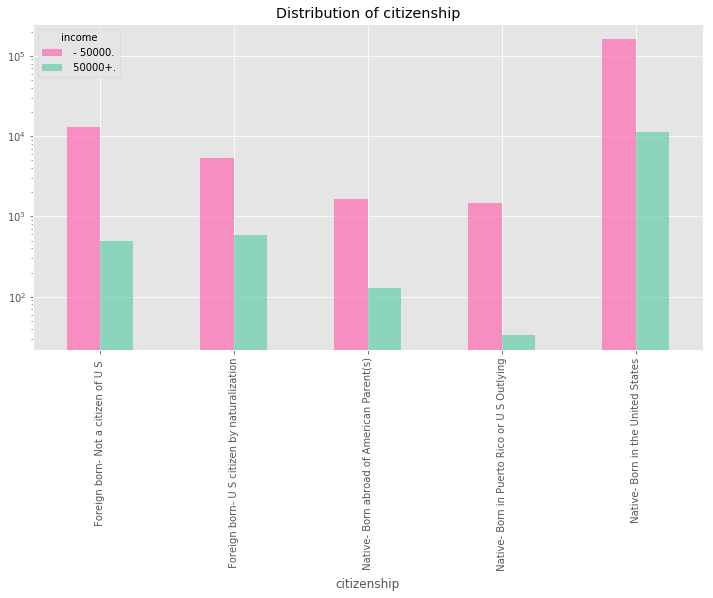

In [23]:
plot_bar_income('citizenship')

## Ethnicity

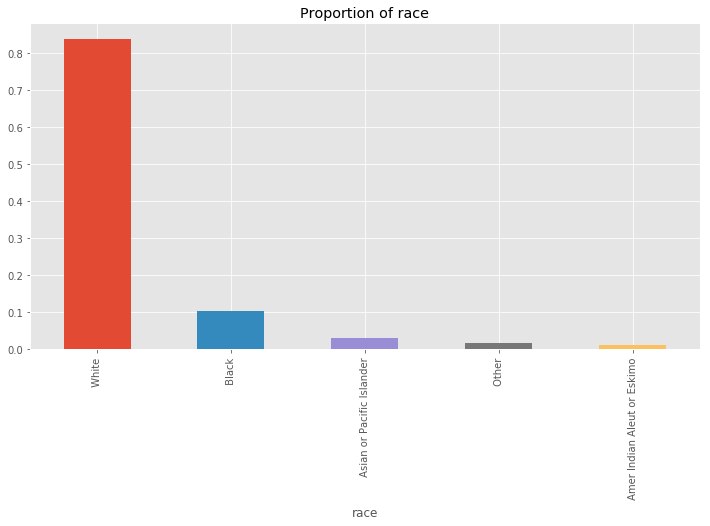

In [24]:
plot_bar('race')

More than 80% of people in the dataset are white people. Other ethnicites are barely represented. We will see later if ethnicity has an influence on the income.

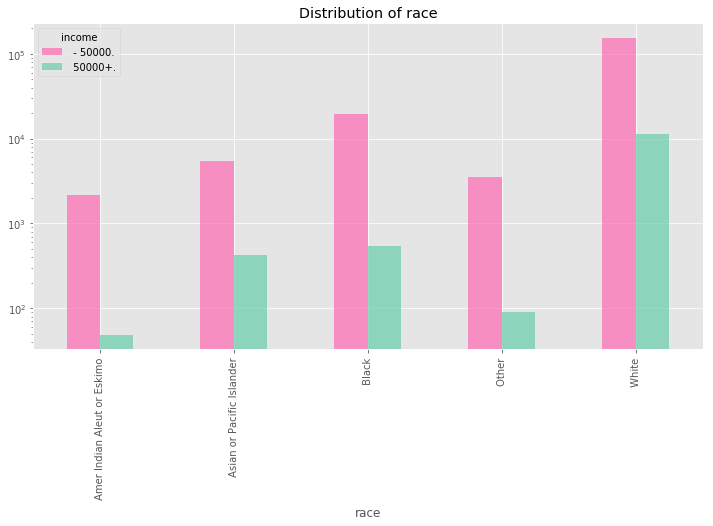

In [25]:
plot_bar_income('race')

## Sex

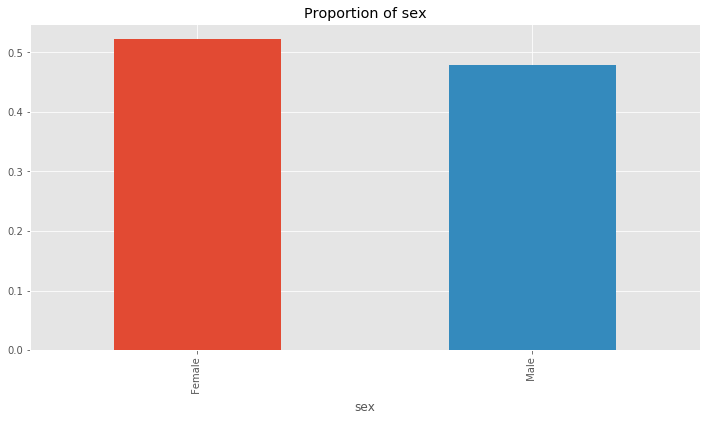

In [26]:
plot_bar('sex')

The proportion of men and women in our dataset is balanced.

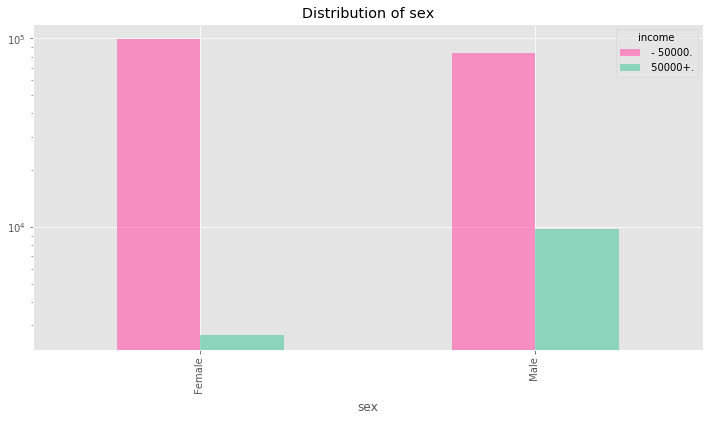

In [27]:
plot_bar_income('sex')

This bar chart clearly illustrates a fact that we hear more and more nowadays : there exists an income difference when it comes to gender. There seem to be bore men that win more than 50k than women. Of course, there might be other factors that can explain the difference (education, age, etc).

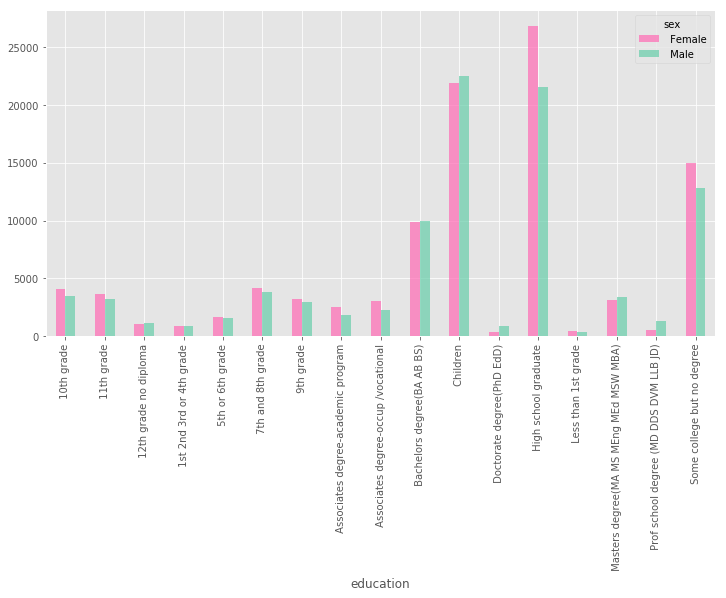

In [28]:
df_train.groupby(['education', 'sex']).count().iloc[:, 0].unstack().plot.bar(logy=False, color=['hotpink', 'mediumaquamarine'], alpha=alp)
plt.show()

Again, education seems to be balanced between men and women. Gender seem to have a direct impact on incomes.

For the moment we only have displayed histograms to represent the data under scrutiny. We can think of some hypotheses from these, although we cannot be absolutely certain and skip to quick and wrong conclusion. We will now use Machine Learning algorithms to go further. 

# Format data for models

Instead of working on all features we have, we decided to focus more on the features we selected above for our histograms, in order to see if they have a direct impact on incomes. These features are mainly selected based on the current context in the US, where some inequalities between genders, race and education remain in the working field. We want to see if data can illustrate this.

In [29]:
# Select columns 
numeric_columns = ['age']
categorical_columns = ['class_of_worker', 'education', 'citizenship', 'race', 'sex', 'industry_code']
selected_columns = numeric_columns + categorical_columns

In [30]:
# Handle categorical features
from sklearn.preprocessing import LabelEncoder

for selected in categorical_columns:
    le = LabelEncoder()
    df_train[selected + '_encoded'] = le.fit_transform(df_train[selected])
    
    # do the same for test
    df_test[selected + '_encoded'] = le.transform(df_test[selected])

In [31]:
selected_columns_encoded = numeric_columns + [selected + '_encoded' for selected in categorical_columns]
df_train[selected_columns_encoded].head()

,age,class_of_worker_encoded,education_encoded,citizenship_encoded,race_encoded,sex_encoded,industry_code_encoded
0,73,3,12,4,4,0,0
1,58,6,16,4,4,1,4
2,18,3,0,0,1,0,0
3,9,3,10,4,4,0,0
4,10,3,10,4,4,0,0


In [32]:
# Feature matrix
X = df_train[selected_columns_encoded].as_matrix()

In [33]:
# Labels
incomes = df_train['income'].as_matrix()
y = [int(incomes[i] == ' 50000+.') for i in range(len_new)] # 1 if income >= 50k, else 0

In [34]:
# Split training data to smaller train + evaluation
from sklearn.model_selection import train_test_split
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.33, random_state=42)

# Models

## Decision Tree Classifier

There are many classifiers we can choose here to test our data : SVM, Random Forest, etc. 

Besides the fact that it is an effective algorithm, the choice of a decision tree classifier for our problem is mainly based on the fact that the result - a decision tree - is relatively easy to understand, not only for engineers, but also for anyone who is interested in seeing the results and the impact of the selected features on incomes. It is visualy easy to analyse with the splittings and inequalities. This is a good model if we want to show the analysis to a potential client for instance. 

We are going to test several parameters to find the best ones for our data. Not only do we want to obtain a robust and accurate model, but we also want not to overfit the data too much and obtain a model that would be too complex. 

### Training

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier(random_state=0, class_weight={0:9, 1:1}) # Add weights since classes are unbalanced

# GridSearch
parameters_dt = {'max_depth':[5, 10, 20, 50, 100]}
clf_dt = GridSearchCV(dt, parameters_dt)
clf_dt.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight={0: 9, 1: 1}, criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [5, 10, 20, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [36]:
clf_dt.score(X_eval, y_eval)

0.936722344005681

The score seems quite satisfying, also we can always try to make better.

In [37]:
clf_dt.best_params_

{'max_depth': 5}

The max_depth parameter is quite low in our case. We do not have to use a complex model to make good predictions.

In [38]:
clf_dt.best_estimator_

DecisionTreeClassifier(class_weight={0: 9, 1: 1}, criterion='gini',
            max_depth=5, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [39]:
from sklearn import tree
tree.export_graphviz(clf_dt.best_estimator_, out_file='tree.dot', filled=True) 

import os
os.system("dot -Tpdf tree.dot -o tree.pdf")
!open tree.pdf
os.system("evince tree.pdf")

32512

In [40]:
from IPython.display import IFrame
IFrame("tree.pdf", width=1000, height=300)

The illustration is a representation of our computed decision tree. We can see which variables separate our classes. In order to understand the decision tree better, we display the corresponding values below

In [48]:
# Print X[i] and corresponding features to understand the decision tree better
for i in range(len(selected_columns)):
    print('X[%d] <-> %s' %(i, selected_columns[i]))
    print('\t | List of possibles values :', sort(df_train[selected_columns_encoded[i]].unique()))

X[0] <-> age
	 | List of possibles values : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90]
X[1] <-> class_of_worker
	 | List of possibles values : [0 1 2 3 4 5 6 7 8]
X[2] <-> education
	 | List of possibles values : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
X[3] <-> citizenship
	 | List of possibles values : [0 1 2 3 4]
X[4] <-> race
	 | List of possibles values : [0 1 2 3 4]
X[5] <-> sex
	 | List of possibles values : [0 1]
X[6] <-> industry_code
	 | List of possibles values : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51]


From what we see, we have a Decision tree with several nodes. Although there are many different cases to take into account, our model seem to explain the whole data quite well, using only a small subset of features.

Even though each feature seem to count, we can see that `industry_code` seem to separate data quite well, and so do `age`, `gender`, and `education`. They are at the top of the decision tree.

Moreover, we were interested earlier to see if `race`does have an impact on incomes. According to our model, it seems not to appear significantly.

### Predictions

In [42]:
# Generate test matrix
X_test = df_test[selected_columns_encoded].as_matrix()

# Labels
incomes_test = df_test['income'].as_matrix()
y_test = [int(incomes[i] == ' 50000+.') for i in range(X_test.shape[0])] # 1 if income >= 50k, else 0

clf_dt.best_estimator_.score(X_test, y_test)

0.9375914676931096

The score is close to what we have during the evaluation phase. This may show that we did not overfit data during training.

## Random Forest

Let's see now if we use a more sophisticated model : a Random Forest classifier. This model consists of constructing multiple decision trees. It enables to compensate the problem of decision trees'overfitting to their training set. Adding randomness during the training phase reduces overfitting and generates very good results. However, we lose interpretability with Random Forest, compared to a single Decision Tree.

We have to tune additional parameters : the nuber of trees in the forest, bootstrap, etc.

### Training

In [43]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(random_state=0, class_weight={0:9, 1:1})

# GridSearch
parameters_rf  = {'max_depth':[5, 10, 20, 25, 30], 'n_estimators':[5, 10, 20, 30]}
clf_rf = GridSearchCV(clf_rf, parameters_rf)
clf_rf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight={0: 9, 1: 1},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [5, 10, 20, 25, 30], 'n_estimators': [5, 10, 20, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [44]:
clf_rf.score(X_eval, y_eval)

0.9380962672512273

In [45]:
clf_rf.best_params_

{'max_depth': 20, 'n_estimators': 30}

In [46]:
clf_rf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight={0: 9, 1: 1},
            criterion='gini', max_depth=20, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=30, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

## Predictions

In [47]:
clf_rf.best_estimator_.score(X_test, y_test)

0.9249814558649586

The computed score using Random Forest is lower than evaluation. It is also lower than our score with Decision trees. 

Our Decision tree seems fine to explain our dataset and to predict income based on features we selected. 